# Import Modules

In [1]:
#Modules Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

plt.style.use('ggplot')

c:\python34\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Ignore Warning

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data to Pandas DataFrame

In [3]:
#Read CSV File to Pandas DataFrame
data=pd.read_csv('train.csv')
features=data.drop("Survived",axis=1)
labels=data[["Survived"]]

# Function for Modifying Raw Data

In [4]:
def modify_data(features):
    useless_features=["PassengerId","Fare","Ticket","Name","Cabin","Age"]
    non_numerical_features=["Sex","Embarked"]

    features.drop(useless_features,inplace=True,axis=1)

    for feature in non_numerical_features:
        mapper=dict()
        for i, element in enumerate(set(features[feature])):
            mapper[element]=i
        features[feature]=features[[feature]].applymap(lambda x: mapper[x])
        
        temp_data=[]
    for i,feature in enumerate(features):
        temp_data.append((data[feature][:,np.newaxis]==data[feature].unique()).astype(int))
    
    features_matrix=[]
    for i in range(len(features.index)):
        features_matrix.append(np.concatenate([temp_data[feature][i] for feature in range(len(list(features)))]))

    features_matrix=np.array(features_matrix)
    
    return features,features_matrix

In [5]:
features,features_matrix = modify_data(features)
labels_matrix=np.array(labels)

# Compare Classifiers

		KNeighborsClassifier
Average Accuracy : 77.88%
Maximum Accuracy : 85.2%
Minimum Accuracy : 55.16%


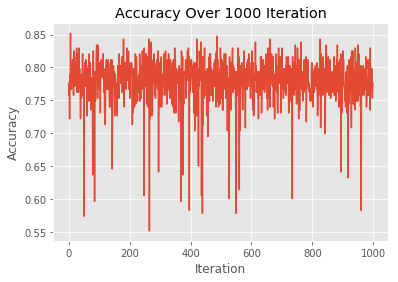


		SVC
Average Accuracy : 80.18%
Maximum Accuracy : 88.34%
Minimum Accuracy : 73.54%


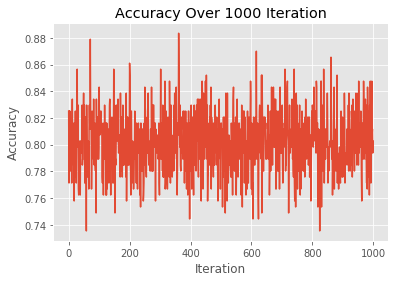


		DecisionTreeClassifier
Average Accuracy : 79.2%
Maximum Accuracy : 86.55%
Minimum Accuracy : 71.3%


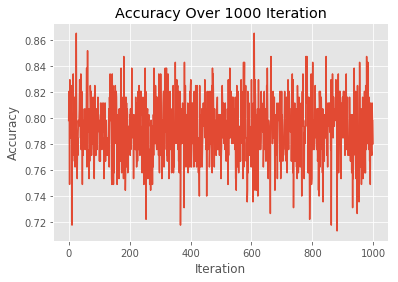


		RandomForestClassifier
Average Accuracy : 78.6%
Maximum Accuracy : 86.55%
Minimum Accuracy : 71.75%


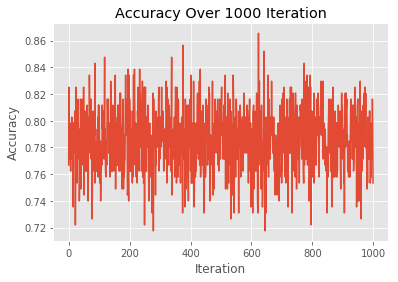


		AdaBoostClassifier
Average Accuracy : 79.29%
Maximum Accuracy : 87.89%
Minimum Accuracy : 72.2%


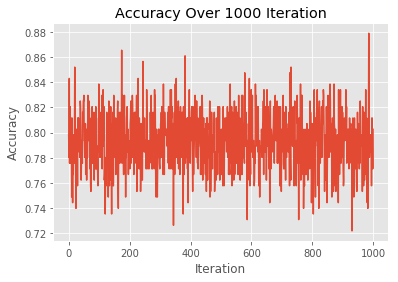


		GaussianNB
Average Accuracy : 77.48%
Maximum Accuracy : 86.1%
Minimum Accuracy : 68.61%


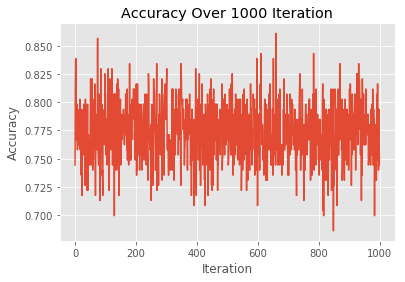

In [6]:
classifiers=["KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GaussianNB"]

for classifier in classifiers: 
    average_accuracy=[]
    exec('model={}()'.format(classifier))
    for i in range(1000):
        features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.25)
        model.fit(features_train,labels_train)
        average_accuracy.append(model.score(features_test,labels_test))
        
    print("\t\t{}".format(classifier))
    print('Average Accuracy : {}%'.format(round(np.mean(average_accuracy)*100,2)))
    print('Maximum Accuracy : {}%'.format(round(np.max(average_accuracy)*100,2)))
    print('Minimum Accuracy : {}%'.format(round(np.min(average_accuracy)*100,2)))
    plt.plot(average_accuracy)
    plt.title("Accuracy Over 1000 Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    print()

# Generate Prediction

In [7]:
model=SVC()
model.fit(features, labels)

test_data=pd.read_csv('test.csv')
test_features,test_features_matrix=modify_data(test_data)

prediction=model.predict(test_features)
prediction=pd.DataFrame(prediction,columns=["Survived"])

prediction["PassengerId"]=range(892,1310)
prediction=prediction[["PassengerId","Survived"]]

prediction.to_csv("prediction.csv",index=False)